In [1]:
# import os

# import py_and_id
from py_and_id import elements as elm, Segment, SegmentCircle
from py_and_id.elements.elements import Element2Term, gap
# from py_and_id import transform
# from py_and_id.util import Point
resheight = 0.35

In [2]:
class CheckVal(Element2Term):
    ''' CheckValve '''
    def __init__(self, *d, **kwargs):
        super().__init__(*d, **kwargs)
        self.segments.append(Segment([(0, 0),
                                      (0, -resheight),  
                                      (0, resheight),
                                      (resheight*2.4, -resheight),
                                      (resheight*2.4, resheight),
                                      (resheight*2.4, 0)
                                      ]))
        self.segments.append(Segment([(0, resheight),
                                      (resheight*2.4, -resheight)], arrow='->',
                                     arrowwidth=.16, arrowlength=.2))
    
a=CheckVal()
a

In [3]:
class Source(Element2Term):
    ''' Generic source element '''
    def __init__(self, *d, **kwargs):
        super().__init__(*d, **kwargs)
        self.segments.append(Segment([(0, 0), (0, 0), gap]))
        self.segments.append(Segment([(0.25, -0.5), (0.15, -0.7), (0.9, -0.7), (0.8, -0.5)]))
        self.segments.append(SegmentCircle((0.5, 0), 0.5))
        
        
                                       
a = Source()
a

In [4]:
class Pump(Source):
    ''' Generic pump element '''
    def __init__(self, *d, **kwargs):
        super().__init__(*d, **kwargs)
        self.segments.append(Segment([(-0.5, 0), (0.5, 0), gap,
                                       (1, 0.2), (1, 0.70), (0.65, 0.7), (0.65, 0.5), (0.65, 0.7), (0.9, 0.7), (0.9, 1.25)
                                       ], arrow="->"))
Pump()

In [5]:
import os

import py_and_id
from py_and_id import elements as elm
from py_and_id import logic
from py_and_id import transform
from py_and_id.util import Point

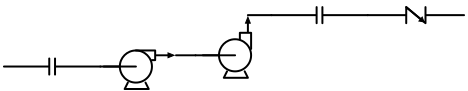

In [6]:
# add_elements function
d = py_and_id.Drawing()
d.add_elements(elm.Flange(),
    elm.Pump(),elm.PumpV(),
    elm.Flange(),
    elm.CheckValve())
d

In [7]:
Point((1, 1))

Point(1,1)

In [8]:
p1 = Point((1, 1))
p2 = Point((2, 2))
p3 = p1 + p2
assert p3 == Point((3, 3))
p3

Point(3,3)

In [9]:
p4 = p2-p1
assert p4 == Point((1, 1))
assert p2-1 == Point((1, 1))
assert 1 - p2 == Point((-1, -1))
p4

Point(1,1)

In [10]:
t = transform.Transform(0, (0,0))
t

Transform: xy=Point(0,0); theta=0; scale=1; lshift=Point(0,0)

In [11]:
assert t.transform((1, 1)) == Point((1, 1))

In [12]:
t = transform.Transform(0, (1, 1))
assert t.transform((1, 1)) == Point((2, 2))

In [14]:
# add_elements function
d = py_and_id.Drawing()
d.add_elements(
    elm.Resistor(),
    # elm.Capacitor(),
    elm.CheckValve())
d

In [17]:
# Context Manager - file save, should still draw in Jupyter
try:
    os.remove('savetest.png')
except FileNotFoundError:
    pass

with py_and_id.Drawing(file='savetest.png') as d:
    d += elm.Resistor()
    # d += elm.Capacitor()
    # d += elm.Diode()
    
assert os.path.exists('savetest.png')

In [18]:
# Matplotlib backend
d.draw(backend='matplotlib')
d.get_imagedata('svg')

TypeError: 'NoneType' object is not callable

In [19]:
# SVG backend
d.draw(backend='svg')
d.get_imagedata('svg')

b'<svg xmlns="http://www.w3.org/2000/svg" xml:lang="en" height="20.2pt" width="101.19999999999999pt" viewBox="-2.0 -10.1 101.19999999999999 20.2"><path d="M 0.0,-0.0 L 32.4,-0.0 L 35.099999999999994,-8.1 L 40.5,8.1 L 45.89999999999999,-8.1 L 51.3,8.1 L 56.699999999999996,-8.1 L 62.099999999999994,8.1 L 64.8,-0.0 L 97.19999999999999,-0.0" style="stroke:black;fill:none;stroke-width:2;stroke-linecap:round;stroke-linejoin:round;" /></svg>'

In [ ]:
py_and_id.svgconfig.text = 'path'  # use ziamath

In [ ]:
d = py_and_id.Drawing(font='serif', fontsize=20)
d += elm.Resistor().label('Hello')
d.draw(backend='matplotlib')

In [ ]:
d = py_and_id.Drawing(font='serif', fontsize=20)
d += elm.Resistor().label('Hello')
d.draw(backend='svg')

In [ ]:
d.save('savetest.png')

In [ ]:
py_and_id.svgconfig.text = 'path'
d = py_and_id.Drawing(font='serif', fontsize=20)
d += elm.Resistor().label(r'$x^2$', valign='bottom')
d.draw(backend='svg')
assert '<symbol' in d.get_imagedata('svg').decode()

In [ ]:
py_and_id.svgconfig.svg2 = False   # use ziamath with SVG1.x
d = py_and_id.Drawing(font='serif', fontsize=20)
d += elm.Resistor().label(r'$x^2$', valign='bottom')
d.draw(backend='svg')
d.get_imagedata('svg').decode()
assert '<symbol' not in d.get_imagedata('svg').decode()

In [ ]:
py_and_id.svgconfig.text = 'text'   # use <text>
d = py_and_id.Drawing(font='serif', fontsize=20)
d += elm.Resistor().label(r'$x^2$', valign='bottom')
d.draw(backend='svg')
assert '<text' in d.get_imagedata('svg').decode()

In [ ]:
py_and_id.svgconfig.text = 'path'
py_and_id.svgconfig.svg2 = True

In [ ]:
# Draw on matplotlib axis, or specify existing axis
import matplotlib.pyplot as plt

In [ ]:
py_and_id.use('matplotlib')
d = py_and_id.Drawing()
d.add(elm.Resistor)
schemfig = d.draw()
schemfig.ax.axvline(.5, color='purple', ls='--')
schemfig.ax.axvline(2.5, color='orange', ls='-', lw=3);
display(schemfig)

In [ ]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
d = py_and_id.Drawing()
d += elm.Inductor()
d.draw(ax=ax)
ax.axvline(0, ls='--', color='red');

In [ ]:
py_and_id.theme('dark')
d = py_and_id.Drawing()
d += elm.FuseUS()
d.draw()

In [ ]:
d.save('testMPL.png')

In [ ]:
# Capstyle names are different in SVG vs Matplotlib
# projecting == butt
d = py_and_id.Drawing()
d += elm.Resistor(capstyle='butt')
d += elm.Resistor(capstyle='projecting')
d.draw()

In [ ]:
d = py_and_id.Drawing()
d += elm.Resistor(capstyle='butt')
d += elm.Resistor(capstyle='projecting')
d.draw(backend='svg')

In [ ]:
py_and_id.theme('default')
d = py_and_id.Drawing()
d += elm.Bjt()
d.draw(showframe=True)

In [ ]:
d = py_and_id.Drawing()
d += elm.Bjt()
d.draw(backend='svg', showframe=True)

In [ ]:
# Test some mathtext in svg backend
py_and_id.use('svg')
d = py_and_id.Drawing(font='sans')
d += elm.Resistor().label('$R_{11}$')
d += elm.Resistor().label('$R^{22}$')
d += elm.Resistor().label(r'$\theta$')
d += elm.Resistor().label('$\overline{Q_1}$')
d += elm.Resistor().label('$R_1$')
d += elm.Resistor().label('$\sqrt{x}$')
d.here = (0, -2)
d += elm.Resistor().label('Ω')
d += elm.Resistor().label('∠')
d += elm.Resistor().label('10%')
d += elm.Resistor().label('$R^2$')
d += elm.Resistor().label('$R_2$')
d.draw()

In [ ]:
# Test some mathtext in svg backend
py_and_id.use('svg')
d = py_and_id.Drawing()
d += elm.Dot().label('R1', rotate=45)
d += elm.Dot().at((1, 0)).label('R1', rotate=45, halign='center')
d += elm.Dot().at((2, 0)).label('R1', rotate=45, halign='right')
d += elm.Dot().at((0, 1)).label('R1', rotate=45, valign='top')
d += elm.Dot().at((1, 1)).label('R1', rotate=45, valign='bottom')
d += elm.Dot().at((2, 1)).label('R1', rotate=45, valign='center')
d.draw()

In [ ]:
from py_and_id.backends import svgtext
from IPython.display import SVG
from xml.etree import ElementTree as ET
# These should appear similar to
# https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/demo_text_rotation_mode.html

In [ ]:
svghead = '<svg xmlns="http://www.w3.org/2000/svg" xml:lang="en" height="150pt" width="150pt">{}</svg>'
s = svgtext.text_tosvg('ABC', 50, 50, halign='left', rotation=45, testmode=True)
SVG(svghead.format(ET.tostring(s, encoding='unicode')))

In [ ]:
# "anchor" rotation mode
s = ET.tostring(svgtext.text_tosvg('ABC', 30, 30, rotation=30,
                       halign='left', valign='top', 
                       testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 90, 30, rotation=30,
                       halign='center', valign='top', 
                       testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 150, 30, rotation=30,
                       halign='right', valign='top', 
                       testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 30, 80, rotation=30,
                       halign='left', valign='center', 
                       testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 90, 80, rotation=30,
                       halign='center', valign='center', 
                       testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 150, 80, rotation=30,
                       halign='right', valign='center', 
                       testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 30, 130, rotation=30,
                       halign='left', valign='bottom', 
                       testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 90, 130, rotation=30,
                       halign='center', valign='bottom', 
                       testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 150, 130, rotation=30,
                       halign='right', valign='bottom', 
                       testmode=True),
                encoding='unicode')

SVG(svghead.format(s))

In [ ]:
# "default" rotation mode
s = ET.tostring(svgtext.text_tosvg('ABC', 30, 30, rotation=30,
                       halign='left', valign='top', 
                       rotation_mode='default', testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 90, 30, rotation=30,
                       halign='center', valign='top', 
                       rotation_mode='default', testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 150, 30, rotation=30,
                       halign='right', valign='top', 
                       rotation_mode='default', testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 30, 80, rotation=30,
                       halign='left', valign='center', 
                       rotation_mode='default', testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 90, 80, rotation=30,
                       halign='center', valign='center', 
                       rotation_mode='default', testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 150, 80, rotation=30,
                       halign='right', valign='center', 
                       rotation_mode='default', testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 30, 130, rotation=30,
                       halign='left', valign='bottom', 
                       rotation_mode='default', testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 90, 130, rotation=30,
                       halign='center', valign='bottom', 
                       rotation_mode='default', testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 150, 130, rotation=30,
                       halign='right', valign='bottom', 
                       rotation_mode='default', testmode=True),
                encoding='unicode')

SVG(svghead.format(s))

In [ ]:
svghead = '<svg xmlns="http://www.w3.org/2000/svg" xml:lang="en" height="150pt" width="150pt">{}</svg>'
s = svgtext.text_tosvg('$A^x$ + $B_1$', 50, 50, halign='left', rotation=145, testmode=True)
SVG(svghead.format(ET.tostring(s)))

In [ ]:
svghead = '<svg xmlns="http://www.w3.org/2000/svg" xml:lang="en" height="150pt" width="150pt">{}</svg>'
s = svgtext.text_tosvg('$A^{xy}$ + $B_{11}$', 50, 50, halign='left', size=22, rotation=-45, testmode=True)
SVG(svghead.format(ET.tostring(s)))

In [ ]:
#py_and_id.settextmode('text')
py_and_id.svgconfig.text = 'text'

In [ ]:
# "default" rotation mode
s = ET.tostring(svgtext.text_tosvg('ABC', 30, 30, rotation=30,
                       halign='left', valign='top', 
                       rotation_mode='default', testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 90, 30, rotation=30,
                       halign='center', valign='top', 
                       rotation_mode='default', testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 150, 30, rotation=30,
                       halign='right', valign='top', 
                       rotation_mode='default', testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 30, 80, rotation=30,
                       halign='left', valign='center', 
                       rotation_mode='default', testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 90, 80, rotation=30,
                       halign='center', valign='center', 
                       rotation_mode='default', testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 150, 80, rotation=30,
                       halign='right', valign='center', 
                       rotation_mode='default', testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 30, 130, rotation=30,
                       halign='left', valign='bottom', 
                       rotation_mode='default', testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 90, 130, rotation=30,
                       halign='center', valign='bottom', 
                       rotation_mode='default', testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 150, 130, rotation=30,
                       halign='right', valign='bottom', 
                       rotation_mode='default', testmode=True),
                encoding='unicode')

SVG(svghead.format(s))

In [ ]:
# "anchor" rotation mode
s = ET.tostring(svgtext.text_tosvg('ABC', 30, 30, rotation=30,
                       halign='left', valign='top', 
                       testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 90, 30, rotation=30,
                       halign='center', valign='top', 
                       testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 150, 30, rotation=30,
                       halign='right', valign='top', 
                       testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 30, 80, rotation=30,
                       halign='left', valign='center', 
                       testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 90, 80, rotation=30,
                       halign='center', valign='center', 
                       testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 150, 80, rotation=30,
                       halign='right', valign='center', 
                       testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 30, 130, rotation=30,
                       halign='left', valign='bottom', 
                       testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 90, 130, rotation=30,
                       halign='center', valign='bottom', 
                       testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 150, 130, rotation=30,
                       halign='right', valign='bottom', 
                       testmode=True),
                encoding='unicode')

SVG(svghead.format(s))

In [ ]:
# Test some mathtext in svg backend - text mode
py_and_id.use('svg')
d = py_and_id.Drawing(font='Times')
d += elm.Resistor().label('$R_{11}$')
d += elm.Resistor().label('$R^{22}$')
d += elm.Resistor().label(r'$\theta$')
d += elm.Resistor().label('$\overline{Q_1}$')
d += elm.Resistor().label('$R_1$')
d += elm.Resistor().label('$\sqrt{x}$')
d.here = (0, -2)
d += elm.Resistor().label('Ω')
d += elm.Resistor().label('∠')
d += elm.Resistor().label('10%')
d += elm.Resistor().label('$R^2$')
d += elm.Resistor().label('$R_2$')
d.draw()

In [ ]:
import copy
import pickle

In [ ]:
d = py_and_id.Drawing()
d.add(r:=elm.Resistor())
copy.deepcopy(d)

In [ ]:
pickle.loads(pickle.dumps(d))